In [1]:
pip install networkx matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Setup
from IPython.display import display, Markdown, Latex, Math
from itertools import combinations
import math
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import numpy as np

# ISBN 10

## Prüfziffer berechnen

In [3]:
def calculateCheckDigit(isbn10):
    sum = 0
    for i in range(9):
        sum += (i + 1) * int(isbn10[i])
    checkDigit = sum % 11
    if checkDigit == 10:
        return 'X'
    else:
        return str(checkDigit)

In [4]:
isbn = "305501517"
display(Markdown(f"isbn10: {isbn}-**{calculateCheckDigit(isbn)}**"))

isbn10: 305501517-**7**

## Zahlendreher erkennen
![Zahlendreher](images/isbn10_zahlendreher.png)

# Inverse/Nullteiler/Ordnung  erkennen
[a] ∈ ℤ_m besitzt genau dann ein Inverses [a]^–1, wenn ggT( a, m ) = 1.

In [5]:
def Inverses(a, m):
    for i in range(m):
        if (a * i) % m == 1:
            return i
    return None

In [6]:
Inverses(6, 11)
# 6 * 2 = 12 % 11 = 1

2

Andernfalls ist [a] ein Nullteiler, d.h. es gibt ein [b] ∈ ℤm mit [a⋅b] = [0].

In [7]:
def NullTeilerErkennen(n):
    nullteiler = []
    for i in range(2, n):
        if n % i == 0:
            nullteiler.append(i)
    return nullteiler

In [8]:
NullTeilerErkennen(4)
# 2 * 2 = 4 % 4 = 0

[2]

*Ordnung*: Die Funktion order(a, p) berechnet die Ordnung eines Elements a in Z^∗_p​, indem sie die kleinste positive Ganzzahl k findet, für die a^k≡ 1 mod p.  

*Primitive Elemente*: Primitive Elemente sind diejenigen, deren Ordnung gleich φ(17)=16 ist. Dies wird durch die Bedingung ord_value == p - 1 erreicht.

In [9]:
def order(a, p):
    k = 1
    current = a % p
    e = f"{a}^{k}={current}%{p}, "
    while current != 1:
        current = (current * a) % p
        k += 1
        e += f"{a}^{k}={current}%{p}, "
    print(e[:-2])
    return k

In [10]:
# Gegebene Zahlen
element = 3
p = 17

ord = order(element, p)
print(f"ord({element})={ord}")

if ord == p - 1:
    print(f"Element {element} ist ein Erzeuger von Z_{p}, primitives Element")
else:
    print(f"Element {element} ist kein Erzeuger von Z_{p}")

3^1=3%17, 3^2=9%17, 3^3=10%17, 3^4=13%17, 3^5=5%17, 3^6=15%17, 3^7=11%17, 3^8=16%17, 3^9=14%17, 3^10=8%17, 3^11=7%17, 3^12=4%17, 3^13=12%17, 3^14=2%17, 3^15=6%17, 3^16=1%17
ord(3)=16
Element 3 ist ein Erzeuger von Z_17, primitives Element


#  System voller Kongruenzen mit z===a mod k, mit z=const.

In [11]:
def solve_congruence(z, a, k):
    if (z - a) % k == 0:
        return True, (z - a) // k
    else:
        return False, None

In [12]:
# Beispielwerte
z = 10  # Konstante
a = 2   # Wert der Kongruenz
k = 4   # Modulus

ergebnis, vielfaches = solve_congruence(z, a, k)
if ergebnis:
    print(f"{z} ≡ {a} (mod {k}) ist erfüllt. Vielfaches: {vielfaches}")
else:
    print(f"{z} ≡ {a} (mod {k}) ist nicht erfüllt.")

10 ≡ 2 (mod 4) ist erfüllt. Vielfaches: 2


# GGT, GGT Rückwärts, Lemma von Bezout

## GGT - Euklidischer Algorithmus

In [13]:
def ggT(a, b, verbose=True):
    while b != 0:
        reminder = a % b
        factor = a // b
        if verbose:
            print(f"{a} = {factor} * {b} + {reminder}")
        a = b
        b = reminder
    return a

In [14]:
a = 2406
b = 654
display(Markdown(f"ggt({a}, {b}) = **{ggT(a, b)}**"))

2406 = 3 * 654 + 444
654 = 1 * 444 + 210
444 = 2 * 210 + 24
210 = 8 * 24 + 18
24 = 1 * 18 + 6
18 = 3 * 6 + 0


ggt(2406, 654) = **6**

## Euklidischer Algorithmus rückwärts

In [15]:
def ggTRueckwaerts(a, b):
    if a == 0:
        return b, 0, 1
    gcd, x1, y1 = ggTRueckwaerts(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return gcd, x, y

In [16]:
a = 2406
b = 654
gcd, x, y = ggTRueckwaerts(a, b)
display(Markdown(f"{gcd} = **{x}** * {a} + **{y}** * {b}"))

6 = **28** * 2406 + **-103** * 654

## Lemma von Bezout
![Zahlendreher](images/lemma_bezout.png)

In [17]:
def lemma_bezout(a, b):
    print(f"{a} * x - {b} * y = 0\n")
    print("=== ggt ===")
    gcd = ggT(a, b)
    print(f"\nggt({a}, {b}) = {gcd}")
    print("=== ggt ===\n")

    # allgemeine Lösung xn = (x y)^t
    x = b // gcd
    y = a // gcd
    r = a * x - b * y


    display(Math(rf"x = \begin{{pmatrix}} x \\ y \end{{pmatrix}} = x_p + x_n t"))

    print(f"allgemeine Lösung:")

    display(Math(rf'2406 \cdot \frac{{{b}}}{{{gcd}}} - 654 \cdot \frac{{{a}}}{{{gcd}}} = {a} \cdot {x} - {b} \cdot {y} = {r}'))
    allgemeineLoesung = rf"\begin{{pmatrix}} {x} \\ {y} \end{{pmatrix}}"
    display(Math(rf'x_n = {allgemeineLoesung}'))

    # partikuläre Lösung p = (px py)^t
    _, px, py, = ggTRueckwaerts(a, b)
    partikiulaereLoesung = rf"\begin{{pmatrix}} {px} \\ {py} \end{{pmatrix}}"
    print(f"partikuläre Lösung:")
    display(Math(rf'x_p = {partikiulaereLoesung}'))

    print("alle Lösungen:")
    display(Math(rf'x = \begin{{pmatrix}} x \\ y \end{{pmatrix}} = {partikiulaereLoesung} + {allgemeineLoesung}t'))
    display(Math(rf"{a} ({px} + {x}t) - {b} ({py} + {y}t) = {gcd}"))

In [18]:
a = 2406
b = 654
lemma_bezout(a, b)

2406 * x - 654 * y = 0

=== ggt ===
2406 = 3 * 654 + 444
654 = 1 * 444 + 210
444 = 2 * 210 + 24
210 = 8 * 24 + 18
24 = 1 * 18 + 6
18 = 3 * 6 + 0

ggt(2406, 654) = 6
=== ggt ===



<IPython.core.display.Math object>

allgemeine Lösung:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

partikuläre Lösung:


<IPython.core.display.Math object>

alle Lösungen:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Chinesischer Restsatz - simultane Kongruenzen

In [19]:
def chinesischer_restklassensatz(congruences):
    print("Chinesischer Restklassensatz:")
    # Extract divisors and remainders from tuples
    num = [n for n, r in congruences]
    rem = [r for n, r in congruences]

    # Compute product of all numbers
    prod = 1
    for n in num:
        prod *= n
    print(f"mod = {" * ".join(map(str, num))} = {prod}\n")

    terms = []
    result = 0
    # Apply CRT formula
    for n, r in zip(num, rem):
        pp = prod // n
        gcd, inv, _ = ggTRueckwaerts(pp, n)
        inv = inv % n  # Ensure the inverse is positive
        term = r * pp * inv
        result += term
        terms.append(term)
        print(f"Calculating term for modulus {n}:")
        print(f"pp = {pp}, inverse = {inv}")
        print(f"Term = {r} * {pp} * {inv} = {term}\n")

    result = result % prod
    print(f"Final result:")
    print(f"z = {" + ".join(map(str, terms))} = {result} mod {prod}")
    return result

In [20]:
# z = 3 (mod 5)
# z = 4 (mod 7)
# z = 5x + 3 = 7y + 4
congruences = [(5, 3), # mod 5, rest 3
               (7, 4) # mod 7, rest 4
               ]
chinesischer_restklassensatz(congruences)

Chinesischer Restklassensatz:
mod = 5 * 7 = 35

Calculating term for modulus 5:
pp = 7, inverse = 3
Term = 3 * 7 * 3 = 63

Calculating term for modulus 7:
pp = 5, inverse = 3
Term = 4 * 5 * 3 = 60

Final result:
z = 63 + 60 = 18 mod 35


18

In [21]:
# z = 3 (mod 11) 
# z = 6 (mod 8)
# z = 1 (mod 15)
congruences = [
    (11, 3), # mod 11, rest 3
    (8, 6), # mod 8, rest 6
    (15, 1) # mod 15, rest 1
    ]
chinesischer_restklassensatz(congruences)

Chinesischer Restklassensatz:
mod = 11 * 8 * 15 = 1320

Calculating term for modulus 11:
pp = 120, inverse = 10
Term = 3 * 120 * 10 = 3600

Calculating term for modulus 8:
pp = 165, inverse = 5
Term = 6 * 165 * 5 = 4950

Calculating term for modulus 15:
pp = 88, inverse = 7
Term = 1 * 88 * 7 = 616

Final result:
z = 3600 + 4950 + 616 = 1246 mod 1320


1246

# Primfaktorzerlegung

In [22]:
def p_factorization(n):
    i = 2
    lst = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            lst.append(i)
    if n > 1:
        lst.append(n)
    return lst

In [23]:
p_factorization(360)

[2, 2, 2, 3, 3, 5]

## Euler'sche Phi-Funktion
![Euler'sche Phi-Funktion](images/euler_phi.png)

phi(n) ist die anzahl teilerfremder Zahlen vor n, und es gilt die produktregel sodass phi(360) = phi(8 * 9 * 5) = phi(8) * phi(9) * phi(5)  
phi(8) = phi(2^3) = 2^3 - 2^2 = 4  
phi(9) = phi(3^2) = 3^2 - 3 = 6  
phi(5) = 5 - 1 = 4  
phi(360) = 4 * 6 * 4 = 96  

In [24]:
def euler_phi(n):
    result = n   # Start with result as n
    p = 2

    while p * p <= n:
        if n % p == 0:
            # This is a prime factor, apply the formula
            while n % p == 0:
                n //= p
            result -= result // p
        p += 1

    if n > 1:  # If n is a prime number greater than 1
        result -= result // n

    return result

In [25]:
euler_phi(360)

96

# Binomialkoeffizienten

![binomialkoeffizienten](./images/binomialkoeffizienten.png)

In [26]:
def binomial_coefficient(n, k):
    if k > n or k < 0:
        return 0
    return math.comb(n, k)

In [27]:
# Beispielwerte
n = 5  # Gesamtanzahl der Objekte
k = 3  # Anzahl der zu ziehenden Objekte

ergebnis = binomial_coefficient(n, k)
print(f"Die Anzahl der Möglichkeiten, {k} Objekte aus {n} zu ziehen, ist: {ergebnis}")

Die Anzahl der Möglichkeiten, 3 Objekte aus 5 zu ziehen, ist: 10


![binomische_lehrsatz.png](./images/binomische_lehrsatz.png)


In [28]:
def binomial_expansion(a, b, n):
    expansion = []
    for k in range(n + 1):
        coefficient = math.comb(n, k)
        term = f"{coefficient}*{a}^{n-k}*{b}^{k}"
        expansion.append(term)
    return " + ".join(expansion)

In [29]:
# Beispielwerte
a = 'x'  # erster Term
b = 'y'  # zweiter Term
n = 3    # exponent

ergebnis = binomial_expansion(a, b, n)
print(f"Die Expansion von ({a} + {b})^{n} ist: {ergebnis}")

Die Expansion von (x + y)^3 ist: 1*x^3*y^0 + 3*x^2*y^1 + 3*x^1*y^2 + 1*x^0*y^3


# Tunierplan - Rundenturnier - Blockplan - BIBD
![bibd](images/bibd.png)
  

Parameter:
- v: Anzahl der Varietäten
- k: Länge eines Blocks
- λ (lambda): sagt, wie oft jede 2-elementige Teilmenge der Varietäten {1, 2, …, v} im Blockplan vorkommt
- b: Anzahl der Blöcke (b = v über 2)
- r: Wie oft jede Varietät in einem Block vorkommt (r = v - 1)

In [30]:
def Tunierplan(v):
    pairings = []

    for round in range(1, v):
        round_pairings = []

        for x in range(1, v):
            for y in range(x + 1, v):

                if (x + y) % (v - 1) == round % (v - 1):
                    round_pairings.append((x, y))

            if (x + x) % (v - 1) == round % (v - 1):
                round_pairings.append((x, v))

        pairings.append(round_pairings)
    return pairings

In [31]:
v = teams = 8
plan = Tunierplan(v)

table_header = f"|{'|'.join([f" Runde {i} " for i in range(1, len(plan)+ 1)])} |\n"
table_sep = f"|{'|'.join(["----------" for i in range(1, len(plan)+ 1)])}|\n"

table_body = ""
for row in range(len(plan[0])):
    for col in range(len(plan)):
        table_body += f"|{plan[col][row]}"
    table_body += "|\n"

display(Markdown(table_header + table_sep + table_body))

| Runde 1 | Runde 2 | Runde 3 | Runde 4 | Runde 5 | Runde 6 | Runde 7  |
|----------|----------|----------|----------|----------|----------|----------|
|(1, 7)|(1, 8)|(1, 2)|(1, 3)|(1, 4)|(1, 5)|(1, 6)|
|(2, 6)|(2, 7)|(3, 7)|(2, 8)|(2, 3)|(2, 4)|(2, 5)|
|(3, 5)|(3, 6)|(4, 6)|(4, 7)|(5, 7)|(3, 8)|(3, 4)|
|(4, 8)|(4, 5)|(5, 8)|(5, 6)|(6, 8)|(6, 7)|(7, 8)|


# Prinzip der Inklusion und Exklusion – Siebmethode

In [32]:
def calculate_others(total, counts):

    keys = [key for key in counts.keys() if len(key) == 1]
    characteristics = len(counts)
    with_characteristic = 0

    display(Math(f"|\\Omega| = 73 \\; |r| = {len(keys)}"))
    latex = "|\\Omega|"

    for r in range(1, characteristics + 1):
        latex += "+" if r % 2 == 0 else "-"
        latex += "("        
        for combo in combinations(range(characteristics), r):
            count_key = ''.join(chr(65 + i) for i in combo)

            if count_key in counts:
                latex += f"|{count_key}| + " if len(count_key) == 1 else f"|{' \\cap '.join(count_key)}| + "
                with_characteristic += (-1) ** (r + 1) * counts[count_key]

        latex = latex[:-2] + ")"
    
    while '))' in latex:
        latex = latex.replace('))', ')')
    latex += f" = {total - with_characteristic}"
    display(Math(latex))
    
    return total - with_characteristic

In [33]:
total = 55 # 55 Athleten
counts = {
    'A': 35, # Fußball
    'B': 27, # Leichtathletik
    'C': 12, # Judo
    # 'D': 1, # Handball
    'AB': 13, # Fußball, Leichtathletik
    'AC': 7, # Fußball, Judo
    'BC': 5, # Leichtathletik, Judo
    'ABC': 2, # Fußball, Leichtathletik, Judo
    # 'ABCD': 1 # Fußball, Leichtathletik, Judo, Handball
}

print(f"Andere: {calculate_others(total, counts)}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Andere: 4


In [34]:
total = 73
counts = {
    'A': 20,    
    'B': 25,    
    'C': 52,    
    'AB': 7,     
    'AC': 12,    
    'BC': 17,    
    'ABC': 1
}

print(f"Andere: {calculate_others(total, counts)}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Andere: 11


# RSA - Verschlüsselung

## Prime

In [35]:
def is_prime(n):
  # https://stackoverflow.com/questions/15285534/isprime-function-for-python-language
  if n == 2 or n == 3: return True
  if n < 2 or n%2 == 0: return False
  if n < 9: return True
  if n%3 == 0: return False
  r = int(n**0.5)
  # since all primes > 3 are of the form 6n ± 1
  # start with f=5 (which is prime)
  # and test f, f+2 for being prime
  # then loop by 6. 
  f = 5
  while f <= r:
    # print('\t',f)
    if n % f == 0: return False
    if n % (f+2) == 0: return False
    f += 6
  return True   

In [36]:
def generate_prime_candidate(length):
    p = 0
    while not is_prime(p):
        p = random.getrandbits(length)
    return p

In [37]:
def generate_keys(bit_length=8):
    # Zwei zufällige Primzahlen wählen (für mehr Sicherheit größere Bitlängen verwenden)
    p = generate_prime_candidate(bit_length)
    q = generate_prime_candidate(bit_length)
    while p == q:  # Sicherstellen, dass p und q unterschiedlich sind
        q = generate_prime_candidate(bit_length)

    n = p * q
    phi = (p - 1) * (q - 1)

    # Wählen Sie e, 1 < e < phi und e ist relativ prim zu phi
    e = random.randrange(1, phi)
    while ggT(e, phi, False) != 1:
        e = random.randrange(1, phi)

    # Berechnen des modularen Inversen von e
    d = Inverses(e, phi)

    # Öffentlichen und privaten Schlüssel zurückgeben
    return (e, n), (d, n), p, q, phi

## RSA

In [38]:
bit_length = 8
(e, n), (d, m), p, q, phi = generate_keys(bit_length)
print(f"Öffentlicher Schlüssel: ({e}, {n})")
print(f"Privater Schlüssel: ({d}, {m})")
print(f"p: {p}")
print(f"q: {q}")
print(f"phi: {phi}")

Öffentlicher Schlüssel: (9763, 22999)
Privater Schlüssel: (20947, 22999)
p: 211
q: 109
phi: 22680


In [39]:
# Änderbare Parameter
# p, q, e, d, w

p = 11 # Primzahl, groß
q = 13 # Primzahl, groß
m = p * q # Modulus, ist öffentlich, schwer zu faktorisieren
print(f"p, q gültig: {is_prime(p) and is_prime(q)}")

# e und phi müssen teilerfremd sein
e = 13 # öffentlicher Schlüssel
phi = euler_phi(m)
print(f"e und phi sind teilerfremd: {ggT(e, phi, False) == 1}")

d = 77 # privater Schlüssel
w = 8 # Nachricht

c = w ** e % m # Verschlüsselung
w_1 = c ** d % m # Entschlüsselung

print(f"c = {w}^{e} mod {m} = {c}")
print(f"w_1 = {c}^{d} mod {m} = {w_1}")

p, q gültig: True
e und phi sind teilerfremd: True
c = 8^13 mod 143 = 138
w_1 = 138^77 mod 143 = 8


# Perfekte Zahlen

Eine perfekte Zahl ist eine positive ganze Zahl n, die gleich der Summe ihrer positiven Teiler (außer sich selbst) ist. Zum Beispiel ist 6 eine perfekte Zahl, weil ihre Teiler 1, 2 und 3 sind und 1+2+3=6.  
Um zu zeigen, dass n eine perfekte Zahl ist, musst du folgende Schritte durchführen:
- Finde die positiven Teiler von n (außer nn selbst).
- Berechne die Summe dieser Teiler.
- Zeige, dass diese Summe gleich n ist.

σ(n): Summe der positiven Teiler von n.  
d(n): Anzahl der positiven Teiler von n.

In [40]:
def is_perfect_number(n):
    if n <= 1:
        return False
    divisors = list(i for i in range(1, n) if n % i == 0)
    divisors_sum = sum(divisors)
    return (divisors_sum == n), divisors

In [41]:
# Beispielwert
n = 6  # Prüfe, ob 6 eine perfekte Zahl ist
b, divisors = is_perfect_number(n)
if b:
    print(f"{n} ist eine perfekte Zahl. Teiler: {divisors}, σ({n}) = {sum(divisors)}")
else:
    print(f"{n} ist keine perfekte Zahl. Teiler: {divisors}, Summe: {sum(divisors)}")

print(f"d({n}) = {len(divisors)}")

6 ist eine perfekte Zahl. Teiler: [1, 2, 3], σ(6) = 6
d(6) = 3


# Berechnung der Determinante einer Matrix

In [42]:
def determinant(matrix):
    # Basisfall für 1x1-Matrix
    if len(matrix) == 1:
        return matrix[0][0], f"{matrix[0][0]}"
    
    # Basisfall für 2x2-Matrix
    if len(matrix) == 2:
        formel = f"{matrix[0][0]} * {matrix[1][1]} - {matrix[0][1]} * {matrix[1][0]}"
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0], formel
    
    det = 0
    formeln = []
    for c in range(len(matrix)):
        # Erzeugt eine Untermatrix durch Entfernen der ersten Zeile und der c-ten Spalte
        submatrix = [row[:c] + row[c+1:] for row in matrix[1:]]
        # Rekursive Berechnung der Determinante
        d, sub_formel = determinant(submatrix)
        det += ((-1) ** c) * matrix[0][c] * d

        formel = f"{"+ " if ((-1) ** c) == 1 else "- "} {matrix[0][c]} * ({sub_formel})"
        formeln.append(formel)
    
    return det, f"{' '.join(formeln)}"[2:]

In [43]:
# Definition der Matrix L
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

det, f = determinant(matrix)
print(f"Die Determinante der Matrix L ist: {det}")
print(f"Die Formel für die Determinante lautet: {f}")


Die Determinante der Matrix L ist: 0
Die Formel für die Determinante lautet:  1 * ( 6 * (11 * 16 - 12 * 15) -  7 * (10 * 16 - 12 * 14) +  8 * (10 * 15 - 11 * 14)) -  2 * ( 5 * (11 * 16 - 12 * 15) -  7 * (9 * 16 - 12 * 13) +  8 * (9 * 15 - 11 * 13)) +  3 * ( 5 * (10 * 16 - 12 * 14) -  6 * (9 * 16 - 12 * 13) +  8 * (9 * 14 - 10 * 13)) -  4 * ( 5 * (10 * 15 - 11 * 14) -  6 * (9 * 15 - 11 * 13) +  7 * (9 * 14 - 10 * 13))


# Dijkstra-Algorithmus

In [44]:
def dijkstra(graph, start):
    # Initialisiere die Distanzen mit Unendlichkeit und setze die Startdistanz auf 0
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    predecessors = {vertex: None for vertex in graph}

    # Verwende einen Vorrangwarteschlange für die zu verarbeitenden Knoten
    priority_queue = [(0, start)]
    
    # Solange die Warteschlange nicht leer ist
    while priority_queue:
        # Wähle den Knoten mit der kleinsten Distanz
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Wenn die aktuelle Distanz größer ist als die bekannte, überspringe diesen Knoten
        if current_distance > distances[current_vertex]:
            continue

        # Überprüfe die Nachbarn des aktuellen Knotens
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Wenn ein kürzerer Pfad gefunden wird, aktualisiere die Distanz und füge zur Warteschlange hinzu
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    # Konstruiere die Pfade von Start zu allen anderen Knoten
    paths = {}
    for vertex in graph:
        path = []
        step = vertex
        while step is not None:
            path.insert(0, step)
            step = predecessors[step]
        if path[0] == start:  # Prüfe, ob ein gültiger Pfad existiert
            paths[vertex] = path

    return distances, paths

In [45]:
def draw_graph(graph):
    G = nx.Graph()

    # Füge Kanten mit Gewichten hinzu
    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)
    
    # Zeichne den Graphen
    pos = nx.spring_layout(G)  # Positionierung der Knoten
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    # Zeige den Graphen an
    plt.title('Graphische Darstellung des Graphen')
    plt.show()

{'A': 0, 'B': 1, 'C': 3, 'D': 4}
Kürzeste Pfade:
A: A
B: A -> B
C: A -> B -> C
D: A -> B -> C -> D


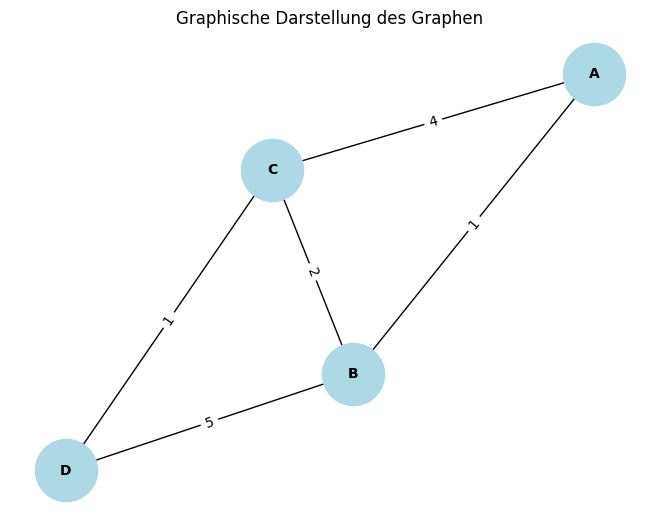

In [46]:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Finde den kürzesten Pfad von Knoten 'A'
distances, paths = dijkstra(graph, 'A')
print(distances)
print("Kürzeste Pfade:")
for destination, path in paths.items():
    print(f"{destination}: {' -> '.join(path)}")
draw_graph(graph)

# Max-Flow

In [47]:
def bfs(graph, source, sink, parent):
    visited = set()
    queue = [source]
    visited.add(source)

    while queue:
        u = queue.pop(0)

        for v, capacity in graph[u].items():
            if v not in visited and capacity > 0:
                queue.append(v)
                visited.add(v)
                parent[v] = u

                if v == sink:
                    return True
    return False

def dfs(graph, source, visited):
    visited.add(source)
    for v, capacity in graph[source].items():
        if v not in visited and capacity > 0:
            dfs(graph, v, visited)

def ford_fulkerson(graph, source, sink):
    parent = {}
    max_flow = 0

    # Restgraph initialisieren
    residual_graph = defaultdict(dict)
    flow_graph = defaultdict(dict)
    for u in graph:
        for v in graph[u]:
            residual_graph[u][v] = graph[u][v]
            residual_graph[v][u] = 0
            flow_graph[u][v] = 0

    while bfs(residual_graph, source, sink, parent):
        path_flow = float('Inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, residual_graph[parent[s]][s])
            s = parent[s]

        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= path_flow
            residual_graph[v][u] += path_flow
            flow_graph[u][v] += path_flow
            v = parent[v]

        max_flow += path_flow

    # DFS, um erreichbare Knoten im Restgraphen zu finden
    visited = set()
    dfs(residual_graph, source, visited)

    # Bestimmung des minimalen Schnitts
    min_cut = []
    for u in graph:
        for v in graph[u]:
            if u in visited and v not in visited:
                min_cut.append((u, v))

    return max_flow, flow_graph, min_cut

In [48]:
# graph = {
#     's': {'a': 4, 'b': 5},
#     'a': {'b': 3, 'c': 5},
#     'b': {'c': 4, 'd': 6},
#     'c': {'t': 6},
#     'd': {'t': 2},
#     't': {}
# }

graph = {
    's': {'a': 9, 'k': 4},

    'a': {'b': 3, 'f': 6},
    'k': {'e': 5, 'f': 1},

    'f': {'b': 7, 'e': 3},

    'b': {'g': 3},
    'e': {'b': 1, 'g': 5},

    'g': {'c': 2, 'l': 7},

    'c': {'t': 8, 'b': 5},
    'l': {'e': 3, 't': 5},

}

source = 's'
sink = 't'

# Gesucht ist ein maximaler Fluss x und ein minimaler Schnitt E(S).
max_flow, flow_graph, min_cut = ford_fulkerson(graph, source, sink)
print(f"Der maximale Fluss ist {max_flow}")
mc = sum([graph[u][v] for u, v in min_cut])
print(f"Der minimale Schnitt ist {min_cut} = {mc}")

ht = [(u, sink) for u, v in graph.items() if v.get(sink)]
display(Math(f"h_{sink} =\\{{ { ','.join(f'{x[0]}{x[1]}' for x in ht)} \\}} = {sum([graph[u][v] for u, v in ht])}"))

display(Math(f"E^+(S) = \\{{ {','.join(f'{x[0]}{x[1]}' for x in min_cut)} \\}} = {mc}"))
display(Math(f"{max_flow} = h_{sink} x \\leq c(E^+(S)) = {mc}"))

Der maximale Fluss ist 7
Der minimale Schnitt ist [('g', 'c'), ('l', 't')] = 7


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [49]:
def draw_flow_graph(graph, flow_graph, min_cut):
    G = nx.DiGraph()

    for u in graph:
        for v, capacity in graph[u].items():
            flow = flow_graph[u][v]
            if capacity > 0:
                G.add_edge(u, v, capacity=capacity, flow=flow)

    pos = nx.spring_layout(G, k=15, iterations=5000, scale=2)
    edge_labels = {(u, v): f"{data['flow']}/{data['capacity']}" for u, v, data in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20)

    # Zeichne den minimalen Schnitt in einer anderen Farbe
    nx.draw_networkx_edges(G, pos, edgelist=min_cut, edge_color='red', width=2, style='dashed')
    plt.title('Visualisierung des Netzwerkflusses und des minimalen Schnitts')
    plt.show()

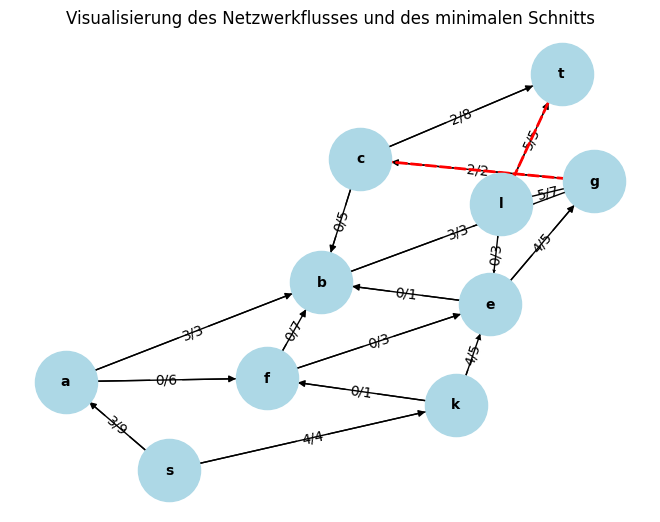

In [50]:
draw_flow_graph(graph, flow_graph, min_cut)

# Hamilton Zyklus

In [51]:
def valid_connection(
    graph: list[list[int]], next_ver: int, curr_ind: int, path: list[int]
) -> bool:
     # 1. Validate that path exists between current and next vertices
    if graph[path[curr_ind - 1]][next_ver] == 0:
        return False

    # 2. Validate that next vertex is not already in path
    return not any(vertex == next_ver for vertex in path)

def util_hamilton_cycle(graph: list[list[int]], path: list[int], curr_ind: int) -> bool:
    # Base Case
    if curr_ind == len(graph):
        # return whether path exists between current and starting vertices
        return graph[path[curr_ind - 1]][path[0]] == 1

    # Recursive Step
    for next_ver in range(len(graph)):
        if valid_connection(graph, next_ver, curr_ind, path):
            # Insert current vertex  into path as next transition
            path[curr_ind] = next_ver
            # Validate created path
            if util_hamilton_cycle(graph, path, curr_ind + 1):
                return True
            # Backtrack
            path[curr_ind] = -1
    return False

def hamilton_cycle(graph: list[list[int]], start_index: int = 0) -> list[int]:
     # Initialize path with -1, indicating that we have not visited them yet
    path = [-1] * (len(graph) + 1)
    # initialize start and end of path with starting index
    path[0] = path[-1] = start_index
    # evaluate and if we find answer return path either return empty array
    return path if util_hamilton_cycle(graph, path, 1) else []



In [52]:
graph = [[0, 1, 0, 1, 0], # 0 -> 1, 0 -> 3
        [1, 0, 1, 1, 1], # 1 -> 0, 1 -> 2, 1 -> 3, 1 -> 4
        [0, 1, 0, 0, 1], # 2 -> 1, 2 -> 4
        [1, 1, 0, 0, 1], # 3 -> 0, 3 -> 1, 3 -> 4
        [0, 1, 1, 1, 0]] # 4 -> 1, 4 -> 2, 4 -> 3
h = hamilton_cycle(graph) # [0, 1, 2, 4, 3, 0]
print(h)

# graph = [[0, 1, 0, 1, 0],
#         [1, 0, 1, 1, 1],
#         [0, 1, 0, 0, 1],
#         [1, 1, 0, 0, 1],
#         [0, 1, 1, 1, 0]]
# h = hamilton_cycle(graph, 3) # [3, 0, 1, 2, 4, 3]
# print(h)

# graph = [[0, 1, 0, 1, 0],
#         [1, 0, 1, 1, 1],
#         [0, 1, 0, 0, 1],
#         [1, 1, 0, 0, 0],
#         [0, 1, 1, 0, 0]]
# h = hamilton_cycle(graph,4) # no
# print(h)


[0, 1, 2, 4, 3, 0]


In [53]:
def plot_hamilton(graph, cycle):
    # Create a graph
    G = nx.Graph()
    
    # Add edges based on the adjacency matrix
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] == 1:
                G.add_edge(i, j)


    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

    # Overlay the Hamiltonian cycle
    for i in range(len(cycle) - 1):
        nx.draw_networkx_edges(G, pos, edgelist=[(cycle[i], cycle[i + 1])], edge_color='red', width=2)

    # Show the plot
    plt.show()

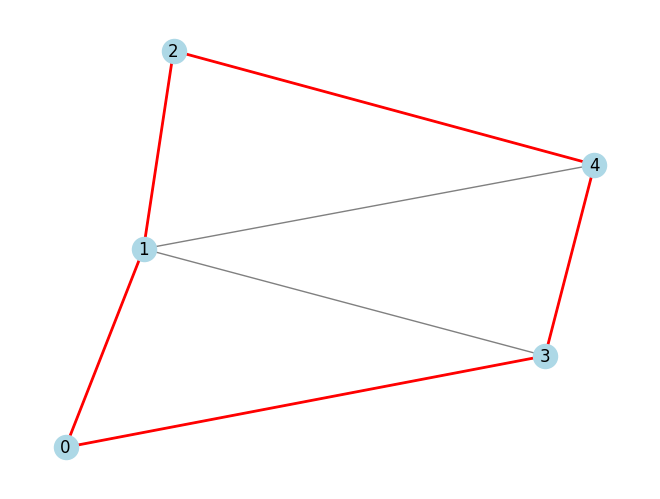

In [54]:
plot_hamilton(graph, h)